In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

 ## Input

In [2]:
df=pd.read_excel("C:/Users/Lenovo/OneDrive/Documents/Kuliah/KP/data_fix_banget(2).xlsx", sheet_name='Sheet1')
df.head()

,id,badan_usaha,nama_perusahaan,nama_pemilik,jalan,kelurahan,kecamatan,kabupaten,telepon,fax,...,nilai_bb,pemasaran_ekspor,npwp,nib,tdp,latitude,longitude,source_data,klasifikasi,verified
0,378071,PO,Marjono,Marjono,Mujiono,NaN,NaN,Kabupaten Pacitan,087750646076,NaN,...,67000.0,NaN,NaN,NaN,NaN,NaN,NaN,data smooth,Kecil,Belum Terverifikasi
1,379507,PO,Sate Ayam Pak Taman,Sutaman,"Jl. Sambirobyong No. 73, Ponorogo",NaN,NaN,Kabupaten Ponorogo,0352 488034,NaN,...,283052.0,NaN,NaN,NaN,NaN,NaN,NaN,data smooth,Kecil,Belum Terverifikasi
2,379508,PO,Sate Ayam Sugianto,Sugianto,"Jl. Sambirobyong No. 75, Ponorogo",NaN,NaN,Kabupaten Ponorogo,NaN,NaN,...,25252.0,NaN,NaN,NaN,NaN,NaN,NaN,data smooth,Kecil,Belum Terverifikasi
3,382783,PO,IDOLA,ROYANI,KALANGAN RT/RW 02/03,NaN,NaN,Kabupaten Tulungagung,85736411416,NaN,...,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,data smooth,Kecil,Belum Terverifikasi
4,383114,PO,MAGFIROH,SUKIMIN,NaN,NaN,NaN,Kabupaten Tulungagung,NaN,NaN,...,81000.0,NaN,NaN,NaN,NaN,NaN,NaN,data smooth,Kecil,Belum Terverifikasi


In [4]:
df.head()

,id,badan_usaha,nama_perusahaan,nama_pemilik,jalan,kelurahan,kecamatan,kabupaten,telepon,fax,...,nilai_bb,pemasaran_ekspor,npwp,nib,tdp,latitude,longitude,source_data,klasifikasi,verified
0,378071,PO,Marjono,Marjono,Mujiono,NaN,NaN,Kabupaten Pacitan,087750646076,NaN,...,67000.0,NaN,NaN,NaN,NaN,NaN,NaN,data smooth,Kecil,Belum Terverifikasi
1,379507,PO,Sate Ayam Pak Taman,Sutaman,"Jl. Sambirobyong No. 73, Ponorogo",NaN,NaN,Kabupaten Ponorogo,0352 488034,NaN,...,283052.0,NaN,NaN,NaN,NaN,NaN,NaN,data smooth,Kecil,Belum Terverifikasi
2,379508,PO,Sate Ayam Sugianto,Sugianto,"Jl. Sambirobyong No. 75, Ponorogo",NaN,NaN,Kabupaten Ponorogo,NaN,NaN,...,25252.0,NaN,NaN,NaN,NaN,NaN,NaN,data smooth,Kecil,Belum Terverifikasi
3,382783,PO,IDOLA,ROYANI,KALANGAN RT/RW 02/03,NaN,NaN,Kabupaten Tulungagung,85736411416,NaN,...,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,data smooth,Kecil,Belum Terverifikasi
4,383114,PO,MAGFIROH,SUKIMIN,NaN,NaN,NaN,Kabupaten Tulungagung,NaN,NaN,...,81000.0,NaN,NaN,NaN,NaN,NaN,NaN,data smooth,Kecil,Belum Terverifikasi


## Pre-Processing

In [3]:
df.isnull().sum()/df.shape[0] * 100

id                   0.000000
badan_usaha          0.000000
nama_perusahaan      0.001477
nama_pemilik        41.489448
jalan                2.841652
kelurahan           60.750929
kecamatan           55.051374
kabupaten            0.000000
telepon             61.937228
fax                 94.083277
email               78.057897
website             92.125071
ijin_ui             92.864477
tahun_berdiri       65.966657
tahun_ijin          65.909779
kbli_kode            0.000000
komoditi            40.106664
jenis_produk        44.806063
tahun_data          43.545897
tk_laki              5.736488
tk_perempuan         5.736488
nilai_inves          5.838424
jumlah              81.045805
satuan              75.355114
nilai_produksi      39.730682
nilai_bb            39.636871
pemasaran_ekspor    78.587521
npwp                95.208267
nib                 71.925483
tdp                 98.346863
latitude            68.782455
longitude           68.758818
source_data          0.000000
klasifikas

In [4]:
df.drop(columns=['id','nama_perusahaan','nama_pemilik','jalan','kelurahan','kecamatan','telepon','fax','email','website','komoditi','ijin_ui','tahun_berdiri','tahun_ijin','tahun_data','jenis_produk','jumlah','satuan','pemasaran_ekspor','npwp','nib','tdp','latitude','longitude','source_data','verified'], inplace=True)

In [5]:
df

,badan_usaha,kabupaten,kbli_kode,tk_laki,tk_perempuan,nilai_inves,nilai_produksi,nilai_bb,klasifikasi
0,PO,Kabupaten Pacitan,10130,1.0,1.0,60000000.0,112500.0,67000.0,Kecil
1,PO,Kabupaten Ponorogo,10130,2.0,2.0,60000000.0,283052.0,283052.0,Kecil
2,PO,Kabupaten Ponorogo,10130,2.0,2.0,60000000.0,252520.0,25252.0,Kecil
3,PO,Kabupaten Tulungagung,10130,2.0,0.0,200000000.0,40000000.0,21000.0,Kecil
4,PO,Kabupaten Tulungagung,10130,4.0,0.0,125000000.0,75000000.0,81000.0,Kecil
...,...,...,...,...,...,...,...,...,...
135374,Tidak Terdata,Kabupaten Malang,32903,NaN,NaN,NaN,NaN,NaN,Kecil
135375,Tidak Terdata,Kabupaten Malang,32903,NaN,NaN,NaN,NaN,NaN,Kecil
135376,Tidak Terdata,Kabupaten Malang,32903,NaN,NaN,NaN,NaN,NaN,Kecil
135377,Tidak Terdata,Kabupaten Malang,32903,NaN,NaN,NaN,NaN,NaN,Kecil


In [6]:
df['badan_usaha'].value_counts()

badan_usaha
Tidak Terdata    62617
PO               46594
PR               10527
PT Perorangan     9093
PT                4859
CV                1537
UD                  83
Po                  44
PS                  19
TBK                  5
RTR                  1
Name: count, dtype: int64

In [7]:
#Replace PO
df['badan_usaha']= df['badan_usaha'].replace('Po',"PO")
#Commbine tenaga kerja
df['total_tk'] = df['tk_laki'] + df['tk_perempuan']
#drop the unused column (tenaga kerja not combined)
df.drop(columns=['tk_laki','tk_perempuan'], inplace=True)

In [8]:
df.isnull().sum()/df.shape[0] * 100

badan_usaha        0.000000
kabupaten          0.000000
kbli_kode          0.000000
nilai_inves        5.838424
nilai_produksi    39.730682
nilai_bb          39.636871
klasifikasi        0.000000
total_tk           5.736488
dtype: float64

In [9]:
# ganti Kbli_kode jadi object -> int
df['kbli_kode'] = pd.to_numeric(df['kbli_kode'], errors='coerce').fillna(0).astype(int)
print(df['kbli_kode'].dtype)

int32


In [10]:
from sklearn.preprocessing import LabelEncoder

# Buat encoder terpisah untuk setiap kolom
le_badan = LabelEncoder() # Badan usaha menggunakan auto encoder
mapping = {"Besar": 0, "Menengah": 1, "Kecil": 2} # Klasifikasi menggunakan mapping manual

# Fit dan transform
df['badan_usaha_encoded'] = le_badan.fit_transform(df['badan_usaha'])
df["klasifikasi_encoded"] = df["klasifikasi"].map(mapping)

# Tampilkan mapping
print("=== Mapping badan_usaha ===")
for i, cls in enumerate(le_badan.classes_):
    print(f"{cls} --> {i}")

print("\n=== Mapping klasifikasi ===")
for cls, i in mapping.items():
    print(f"{cls} --> {i}")


=== Mapping badan_usaha ===
CV --> 0
PO --> 1
PR --> 2
PS --> 3
PT --> 4
PT Perorangan --> 5
RTR --> 6
TBK --> 7
Tidak Terdata --> 8
UD --> 9

=== Mapping klasifikasi ===
Besar --> 0
Menengah --> 1
Kecil --> 2


In [11]:
# drop kolom yang object
df.drop(columns=['badan_usaha'], inplace=True)
df.drop(columns=['kabupaten'], inplace=True)  #sulit untuk encoding, maka diputuskan untuk di drop

kls = df['klasifikasi']
df.drop(columns=['klasifikasi'], inplace=True)

In [12]:
print(df.dtypes)
print("\nObject columns:")
print(df.select_dtypes(include='object').dtypes)

kbli_kode                int32
nilai_inves            float64
nilai_produksi         float64
nilai_bb               float64
total_tk               float64
badan_usaha_encoded      int32
klasifikasi_encoded      int64
dtype: object

Object columns:
Series([], dtype: object)


In [13]:
# MICE Imputation (Random Forest Based)
import miceforest as mf

# Create a kernel for MICE
kernel = mf.ImputationKernel(
    df,
    random_state=42
)

# Run the MICE algorithm for multiple iterations
kernel.mice(20)

# Get completed data (choose dataset 0, 1, or 2)
df_imputed = kernel.complete_data(dataset=0)

print("After MICE with miceforest:\n", df_imputed.head())


After MICE with miceforest:
    kbli_kode  nilai_inves  nilai_produksi  nilai_bb  total_tk  \
0      10130   60000000.0        112500.0   67000.0       2.0   
1      10130   60000000.0        283052.0  283052.0       4.0   
2      10130   60000000.0        252520.0   25252.0       4.0   
3      10130  200000000.0      40000000.0   21000.0       2.0   
4      10130  125000000.0      75000000.0   81000.0       4.0   

   badan_usaha_encoded  klasifikasi_encoded  
0                    1                    2  
1                    1                    2  
2                    1                    2  
3                    1                    2  
4                    1                    2  


In [14]:
df_imputed.isnull().sum()/df_imputed.shape[0] * 100 # good udah gada missing data

kbli_kode              0.0
nilai_inves            0.0
nilai_produksi         0.0
nilai_bb               0.0
total_tk               0.0
badan_usaha_encoded    0.0
klasifikasi_encoded    0.0
dtype: float64

In [15]:
print(df_imputed['kbli_kode'].unique()) # ada outlier 2 [107944, 0]
df_imputed.drop(columns=['kbli_kode'], inplace=True)  # diputuskan untuk didrop

[ 10130  10211  10212  10213  10214  10215  10216  10217  10219  10221
  10222  10291  10292  10293  10294  10295  10296  10297  10298  10299
  10311  10312  10313  10314  10320  10330  10391  10392  10393  10399
  10411  10412  10413  10414  10415  10421  10422  10423  10424  10431
  10432  10433  10434  10436  10437  10490  10510  10520  10531  10532
  10590  10611  10612  10613  10614  10615  10616  10621  10622  10623
  10629  10631  10632  10633  10634  10635  10710  10721  10722  10723
  10729  10731  10732  10733  10734  10739  10740  10750  10761  10762
  10763  10771  10772  10773  10774  10779  10791  10792  10793  10794
  10795  10796  10799  10801  10802 107944      0  11010  11020  11031
  11032  11040  11051  11052  11090  12011  12012  12013  12019  12091
  12099  13111  13112  13113  13121  13122  13131  13132  13133  13134
  13911  13912  13913  13921  13922  13923  13924  13925  13926  13929
  13930  13941  13942  13991  13992  13993  13994  13995  13996  13999
  1411

In [16]:
# final Dataframe
df_imputed

,nilai_inves,nilai_produksi,nilai_bb,total_tk,badan_usaha_encoded,klasifikasi_encoded
0,60000000.0,112500.0,67000.0,2.0,1,2
1,60000000.0,283052.0,283052.0,4.0,1,2
2,60000000.0,252520.0,25252.0,4.0,1,2
3,200000000.0,40000000.0,21000.0,2.0,1,2
4,125000000.0,75000000.0,81000.0,4.0,1,2
...,...,...,...,...,...,...
135374,0.0,0.0,0.0,0.0,8,2
135375,0.0,0.0,0.0,0.0,8,2
135376,0.0,0.0,41638000.0,68.0,8,2
135377,0.0,0.0,0.0,0.0,8,2


In [17]:
df_imputed.to_csv("df_imputed.csv", index=False)

In [18]:
import IPython
from pathlib import Path

file_path = "df_imputed.csv"
df_imputed.to_csv(file_path, index=False)

IPython.display.display(IPython.display.FileLink(file_path))

c:\Users\Lenovo\OneDrive\Documents\Kuliah\KP\df_imputed.csv

In [19]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/65/60/103dc71019ec2fa987f42f9dbe88641a74edc57f8499fac8896955b66065/imbalanced_learn-0.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/240.0 kB 1.3 MB/s eta 0:00:01
   ----------- --------------------------- 71.7/240.0 kB 787.7 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/240.0 kB 930.9 kB/s eta 0:00:01
   ------------------------ ------------- 153.6/240.0 kB 833.5 kB/s eta 0:00:01
   ------------------------------ ------- 194.6/240.0 kB 908.0 kB/s eta 0:00:01
   -------------------------------------  235.5/240.0 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- 240.0/240.0 kB 814.6 kB/s eta 0:00:00


## Explore Data 




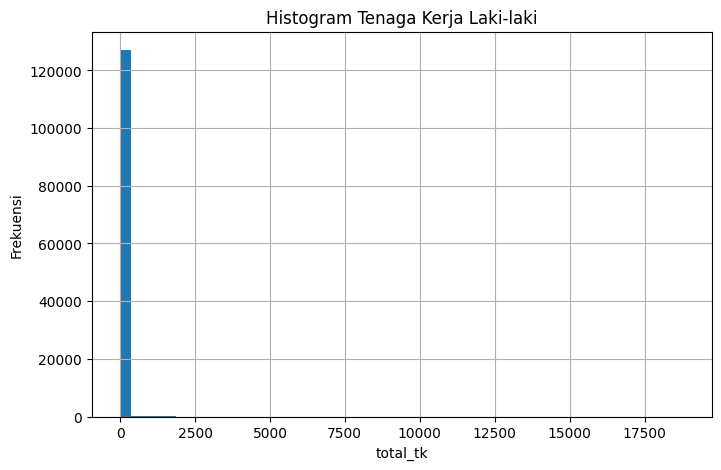

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['total_tk'].hist(bins=50)
plt.xlabel('total_tk')
plt.ylabel('Frekuensi')
plt.title('Histogram Tenaga Kerja Laki-laki')
plt.show()

In [ ]:
df['total_tk'] = df['tk_laki'] + df['tk_perempuan']

In [ ]:
df.drop(columns=['tk_laki','tk_perempuan'], inplace=True)

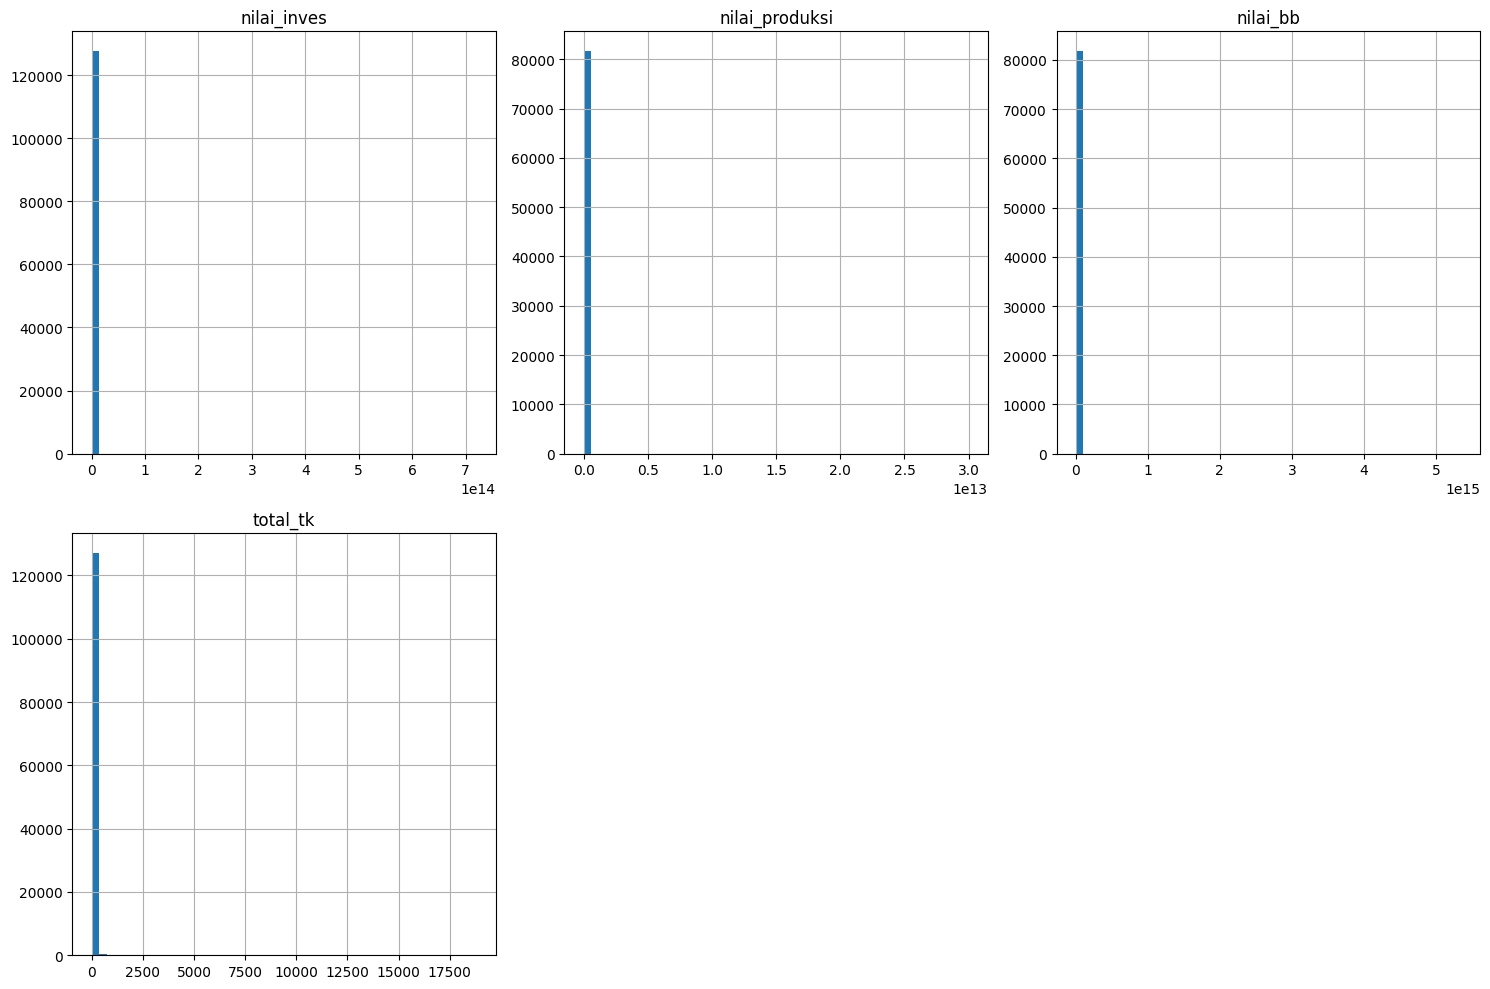

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(figsize=(15, 10), bins=50, layout=(len(numeric_cols)//3+1, 3))
plt.tight_layout()
plt.show()

In [ ]:
df['badan_usaha'].value_counts()

badan_usaha
Tidak Terdata    62617
PO               46594
PR               10527
PT Perorangan     9093
PT                4859
CV                1537
UD                  83
Po                  44
PS                  19
TBK                  5
RTR                  1
Name: count, dtype: int64

In [ ]:
df

,badan_usaha,kabupaten,tahun_berdiri,tahun_ijin,kbli_kode,komoditi,jenis_produk,nilai_inves,nilai_produksi,nilai_bb,pemasaran_ekspor,source_data,klasifikasi,verified,total_tk
0,PO,Kabupaten Pacitan,NaN,NaN,10130,INDUSTRI MAKANAN,Cilok,60000000.0,112500.0,67000.0,NaN,data smooth,Kecil,Belum Terverifikasi,2.0
1,PO,Kabupaten Ponorogo,NaN,NaN,10130,INDUSTRI MAKANAN,NaN,60000000.0,283052.0,283052.0,NaN,data smooth,Kecil,Belum Terverifikasi,4.0
2,PO,Kabupaten Ponorogo,NaN,NaN,10130,INDUSTRI MAKANAN,NaN,60000000.0,252520.0,25252.0,NaN,data smooth,Kecil,Belum Terverifikasi,4.0
3,PO,Kabupaten Tulungagung,NaN,NaN,10130,INDUSTRI MAKANAN,BAKSO SAPI,200000000.0,40000000.0,21000.0,NaN,data smooth,Kecil,Belum Terverifikasi,2.0
4,PO,Kabupaten Tulungagung,NaN,NaN,10130,INDUSTRI MAKANAN,Industri Pengolahan Dan Pengawetan Produk Dagi...,125000000.0,75000000.0,81000.0,NaN,data smooth,Kecil,Belum Terverifikasi,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135374,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,"Aksesoris kalung, bros, gelang dan aksesoris r...",NaN,NaN,NaN,NaN,siinas,Kecil,Verifikasi,NaN
135375,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,NaN,NaN,NaN,NaN,NaN,siinas,Kecil,Verifikasi,NaN
135376,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,NaN,NaN,NaN,NaN,NaN,siinas,Kecil,Verifikasi,NaN
135377,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,NaN,NaN,NaN,NaN,NaN,siinas,Kecil,Verifikasi,NaN


In [ ]:
from sklearn.impute import KNNImputer

# Menggunakan KNNImputer dengan metric 'nan_euclidean' dan mengganti mean dengan median (k-median)
# Namun, KNNImputer sklearn hanya mendukung mean, jadi untuk k-median kita perlu custom
def knn_median_impute(df, columns, n_neighbors=5):
    imputed = df[columns].copy()
    for col in columns:
        # Dapatkan baris yang tidak null untuk kolom ini
        not_null = imputed[col].notnull()
        # Untuk setiap baris yang null, cari k tetangga terdekat berdasarkan kolom lain
        for idx in imputed[~not_null].index:
            # Hitung jarak euclidean ke baris lain yang tidak null
            distances = np.linalg.norm(imputed.loc[not_null, columns].fillna(0).values - imputed.loc[idx, columns].fillna(0).values, axis=1)
            nearest_idx = distances.argsort()[:n_neighbors]
            median_val = imputed.loc[not_null, col].iloc[nearest_idx].median()
            imputed.at[idx, col] = median_val
    return imputed

cols_to_impute = ['nilai_inves', 'nilai_produksi', 'nilai_bb']
df[cols_to_impute] = knn_median_impute(df, cols_to_impute, n_neighbors=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['total_tk_std'] = scaler.fit_transform(df[['total_tk']])
df[['total_tk', 'total_tk_std']]

,total_tk,total_tk_std
0,2.0,-0.060265
1,4.0,-0.044450
2,4.0,-0.044450
3,2.0,-0.060265
4,4.0,-0.044450
...,...,...
135374,NaN,NaN
135375,NaN,NaN
135376,NaN,NaN
135377,NaN,NaN


In [ ]:
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')
df['total_tk'] = pd.DataFrame(imputer.fit_transform(df[['total_tk']]), columns=['total_tk'])
df

,badan_usaha,kabupaten,tahun_berdiri,tahun_ijin,kbli_kode,komoditi,jenis_produk,nilai_inves,nilai_produksi,nilai_bb,pemasaran_ekspor,source_data,klasifikasi,verified,total_tk,total_tk_std
0,PO,Kabupaten Pacitan,NaN,NaN,10130,INDUSTRI MAKANAN,Cilok,60000000.0,112500.0,67000.0,NaN,data smooth,Kecil,Belum Terverifikasi,2.000000,-0.060265
1,PO,Kabupaten Ponorogo,NaN,NaN,10130,INDUSTRI MAKANAN,NaN,60000000.0,283052.0,283052.0,NaN,data smooth,Kecil,Belum Terverifikasi,4.000000,-0.044450
2,PO,Kabupaten Ponorogo,NaN,NaN,10130,INDUSTRI MAKANAN,NaN,60000000.0,252520.0,25252.0,NaN,data smooth,Kecil,Belum Terverifikasi,4.000000,-0.044450
3,PO,Kabupaten Tulungagung,NaN,NaN,10130,INDUSTRI MAKANAN,BAKSO SAPI,200000000.0,40000000.0,21000.0,NaN,data smooth,Kecil,Belum Terverifikasi,2.000000,-0.060265
4,PO,Kabupaten Tulungagung,NaN,NaN,10130,INDUSTRI MAKANAN,Industri Pengolahan Dan Pengawetan Produk Dagi...,125000000.0,75000000.0,81000.0,NaN,data smooth,Kecil,Belum Terverifikasi,4.000000,-0.044450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135374,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,"Aksesoris kalung, bros, gelang dan aksesoris r...",0.0,0.0,0.0,NaN,siinas,Kecil,Verifikasi,9.621308,NaN
135375,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,NaN,0.0,0.0,0.0,NaN,siinas,Kecil,Verifikasi,9.621308,NaN
135376,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,NaN,0.0,0.0,0.0,NaN,siinas,Kecil,Verifikasi,9.621308,NaN
135377,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,NaN,0.0,0.0,0.0,NaN,siinas,Kecil,Verifikasi,9.621308,NaN


In [ ]:
df['total_tk'] = np.ceil(df['total_tk'])
df

,badan_usaha,kabupaten,tahun_berdiri,tahun_ijin,kbli_kode,komoditi,jenis_produk,nilai_inves,nilai_produksi,nilai_bb,pemasaran_ekspor,source_data,klasifikasi,verified,total_tk,total_tk_std
0,PO,Kabupaten Pacitan,NaN,NaN,10130,INDUSTRI MAKANAN,Cilok,60000000.0,112500.0,67000.0,NaN,data smooth,Kecil,Belum Terverifikasi,2.0,-0.060265
1,PO,Kabupaten Ponorogo,NaN,NaN,10130,INDUSTRI MAKANAN,NaN,60000000.0,283052.0,283052.0,NaN,data smooth,Kecil,Belum Terverifikasi,4.0,-0.044450
2,PO,Kabupaten Ponorogo,NaN,NaN,10130,INDUSTRI MAKANAN,NaN,60000000.0,252520.0,25252.0,NaN,data smooth,Kecil,Belum Terverifikasi,4.0,-0.044450
3,PO,Kabupaten Tulungagung,NaN,NaN,10130,INDUSTRI MAKANAN,BAKSO SAPI,200000000.0,40000000.0,21000.0,NaN,data smooth,Kecil,Belum Terverifikasi,2.0,-0.060265
4,PO,Kabupaten Tulungagung,NaN,NaN,10130,INDUSTRI MAKANAN,Industri Pengolahan Dan Pengawetan Produk Dagi...,125000000.0,75000000.0,81000.0,NaN,data smooth,Kecil,Belum Terverifikasi,4.0,-0.044450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135374,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,"Aksesoris kalung, bros, gelang dan aksesoris r...",0.0,0.0,0.0,NaN,siinas,Kecil,Verifikasi,10.0,NaN
135375,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,NaN,0.0,0.0,0.0,NaN,siinas,Kecil,Verifikasi,10.0,NaN
135376,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,NaN,0.0,0.0,0.0,NaN,siinas,Kecil,Verifikasi,10.0,NaN
135377,Tidak Terdata,Kabupaten Malang,NaN,NaN,32903,Pengolahan lainnya,NaN,0.0,0.0,0.0,NaN,siinas,Kecil,Verifikasi,10.0,NaN


In [ ]:
df.isnull().sum()

badan_usaha              0
kabupaten                0
tahun_berdiri        89305
tahun_ijin           89228
kbli_kode                0
komoditi             54296
jenis_produk         60658
nilai_inves              0
nilai_produksi           0
nilai_bb                 0
pemasaran_ekspor    106391
source_data              0
klasifikasi              0
verified                 0
total_tk                 0
total_tk_std          7766
dtype: int64

In [ ]:
df.drop(columns=['tahun_berdiri','tahun_ijin','komoditi','jenis_produk','pemasaran_ekspor','total_tk_std'], inplace=True)

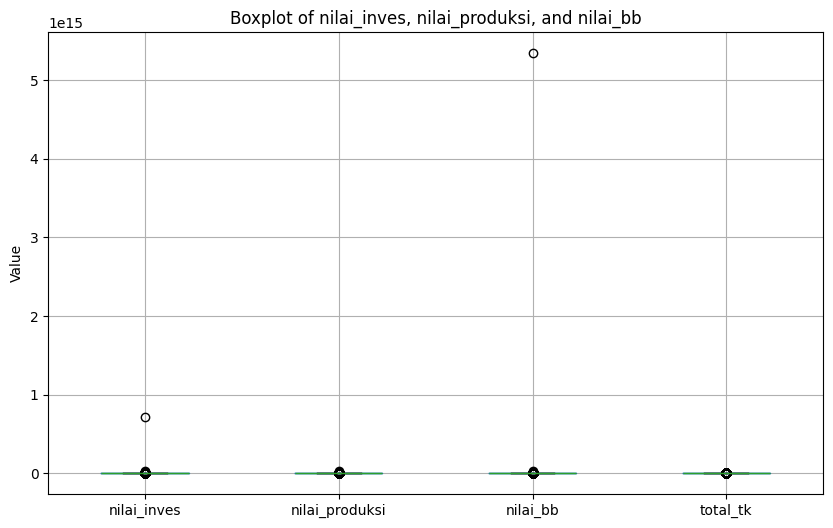

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column=['nilai_inves', 'nilai_produksi', 'nilai_bb', 'total_tk'])
plt.ylabel('Value')
plt.title('Boxplot of nilai_inves, nilai_produksi, and nilai_bb')
plt.show()

In [ ]:
# Mengatasi outlier pada kolom 'nilai_inves' dan 'nilai_bb' menggunakan metode IQR
for col in ['nilai_inves', 'nilai_bb', 'nilai_produksi','total_tk']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Winsorizing: set outlier values to the nearest bound
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

In [ ]:
Q1_tk = df['total_tk'].quantile(0.25)
Q3_tk = df['total_tk'].quantile(0.75)
IQR_tk = Q3_tk - Q1_tk

lower_bound_tk = Q1_tk - 1.5 * IQR_tk
upper_bound_tk = Q3_tk + 1.5 * IQR_tk

outliers_tk = df[(df['total_tk'] < lower_bound_tk) | (df['total_tk'] > upper_bound_tk)]
print(f"Jumlah outlier pada total_tk: {outliers_tk.shape[0]}")
outliers_tk[['total_tk']]

Jumlah outlier pada total_tk: 0


,total_tk


In [ ]:
df['nilai_bb'].value_counts()

nilai_bb
0.0         91098
200000.0    32051
15000.0       218
10000.0       182
3000.0        161
            ...  
60860.0         1
329.0           1
3060.0          1
12111.0         1
57899.0         1
Name: count, Length: 2531, dtype: int64

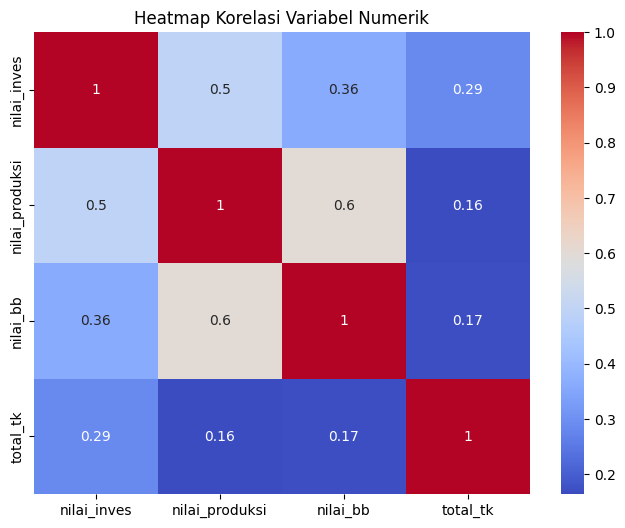

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135379 entries, 0 to 135378
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   badan_usaha     135379 non-null  object 
 1   kabupaten       135379 non-null  object 
 2   kbli_kode       135379 non-null  object 
 3   nilai_inves     135379 non-null  float64
 4   nilai_produksi  135379 non-null  float64
 5   nilai_bb        135379 non-null  float64
 6   source_data     135379 non-null  object 
 7   klasifikasi     135379 non-null  object 
 8   verified        135379 non-null  object 
 9   total_tk        135379 non-null  float64
dtypes: float64(4), object(6)
memory usage: 10.3+ MB


In [ ]:
pca = PCA(n_components=2)  # Ambil 2 komponen utama
komponen = pca.fit_transform(df[['nilai_produksi','nilai_bb']])
df_pca = pd.DataFrame(data=komponen, columns=['PC1','PC2'])
df_final = pd.concat([df, df_pca], axis=1)
df_final.head()


,badan_usaha,kabupaten,kbli_kode,nilai_inves,nilai_produksi,nilai_bb,source_data,klasifikasi,verified,total_tk,PC1,PC2
0,PO,Kabupaten Pacitan,10130,17500000.0,112500.0,67000.0,data smooth,Kecil,Belum Terverifikasi,2.0,-4.470876e+06,47069.285189
1,PO,Kabupaten Ponorogo,10130,17500000.0,283052.0,200000.0,data smooth,Kecil,Belum Terverifikasi,4.0,-4.299425e+06,178907.575882
2,PO,Kabupaten Ponorogo,10130,17500000.0,252520.0,25252.0,data smooth,Kecil,Belum Terverifikasi,4.0,-4.331143e+06,4371.026631
3,PO,Kabupaten Tulungagung,10130,17500000.0,18750000.0,21000.0,data smooth,Kecil,Belum Terverifikasi,2.0,1.416588e+07,-125542.985197
4,PO,Kabupaten Tulungagung,10130,17500000.0,18750000.0,81000.0,data smooth,Kecil,Belum Terverifikasi,4.0,1.416629e+07,-65544.369751


In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [9.99917865e-01 8.21354525e-05]


In [ ]:
pca.components_

array([[ 0.99997692,  0.00679347],
       [-0.00679347,  0.99997692]])

In [10]:
# KNN imputer
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors

# Konversi ke array
X = df[['nilai_inves','total_tk']].to_numpy()

# Tetapkan nilai K
k = 3

# Temukan K tetangga terdekat (mengabaikan NaN sementara)
nbrs = NearestNeighbors(n_neighbors=k, metric='nan_euclidean')
nbrs.fit(X)
distances, indices = nbrs.kneighbors(X)

# Buat salinan data
X_imputed = X.copy()

# Loop untuk imputasi manual dengan median
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if np.isnan(X[i, j]):
            neighbor_vals = X[indices[i], j]
            neighbor_vals = neighbor_vals[~np.isnan(neighbor_vals)]
            if len(neighbor_vals) > 0:
                X_imputed[i, j] = np.median(neighbor_vals)

# Konversi kembali ke DataFrame
df_copy = df.copy()
df_copy[['nilai_inves','total_tk']] = X_imputed
imputed_df = df_copy

print(imputed_df)


KeyboardInterrupt: 

In [ ]:
#Mengubah data string ke kategorik

X = Hasan1.drop(columns="klasifikasi")
y = Hasan1.klasifikasi
#Identifikasi Numerik dan Kategorik
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

#One Hot-Encoding
X = pd.get_dummies(X, columns=categorical_cols, dummy_na=False)

In [ ]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33615, 537), (8404, 537), (33615,), (8404,))

In [ ]:
#Model Training
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


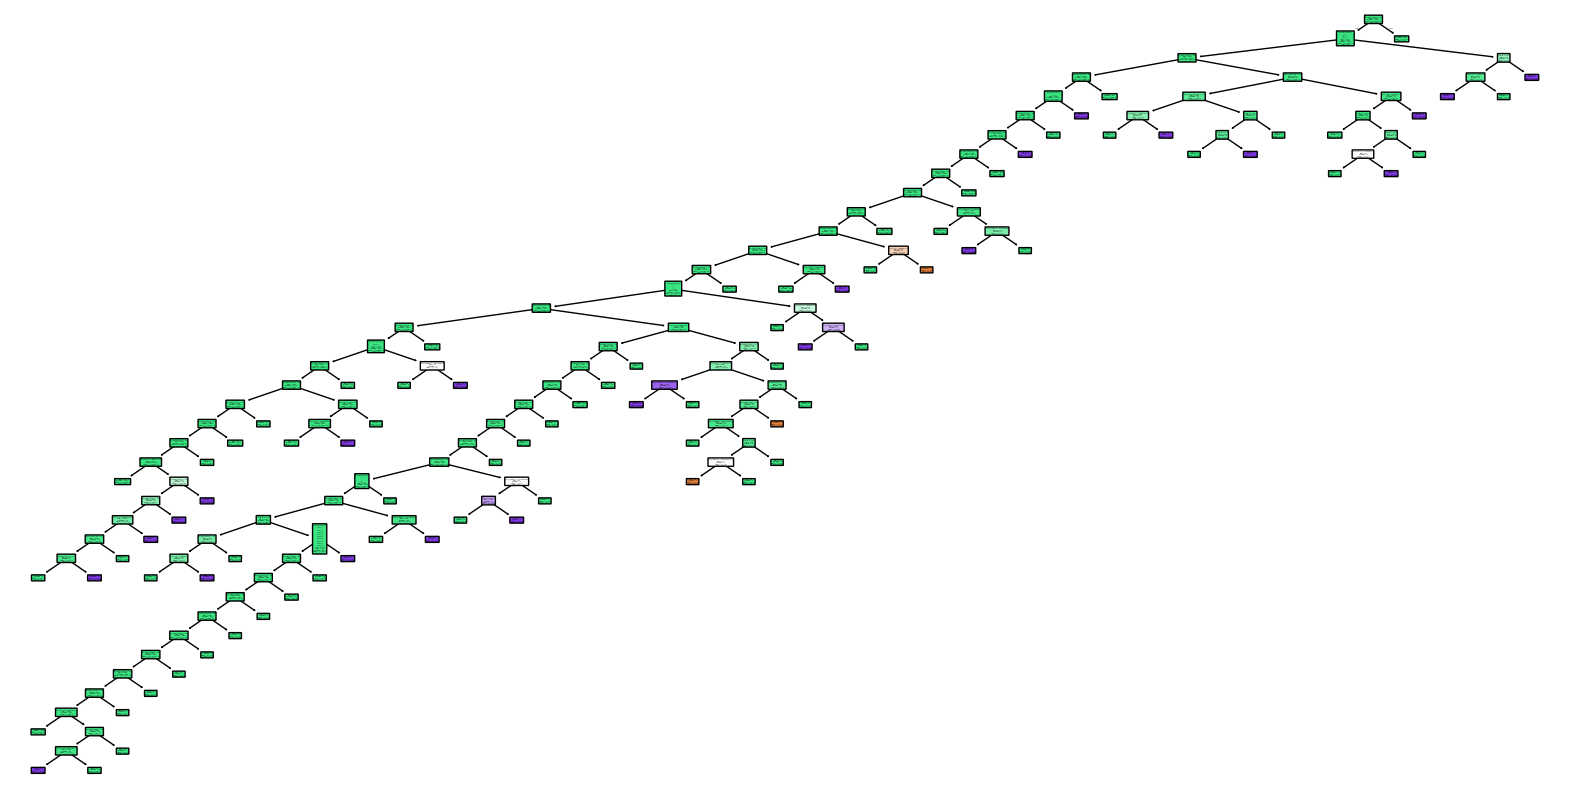

In [ ]:
#Visualisasi Pohon Pertama dalam Random Forest
#Mengambil pohon pertama dari Random Forest
tree = model.estimators_[0]

#Plot pohon pertama
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True, max_depth=50) #Diberi batasan karena melebihi kapabilitas kode untuk menampilkan seluruh pohon
plt.show()

#30 Agustus

## Random Forest

In [21]:
#Mengubah data string ke kategorik

X = df_imputed.drop(columns="klasifikasi_encoded")
y = df_imputed.klasifikasi_encoded
#Identifikasi Numerik dan Kategorik
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [23]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                    
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape, X_test.shape, y_train_resampled.shape, y_test.shape

((320634, 5), (27076, 5), (320634,), (27076,))

In [24]:
#Model Training
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_resampled,y_train_resampled)
y_pred = rfmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Save model and data
from joblib import dump, load

dump(rfmodel, "rfmodel.model")

Accuracy: 0.98


['rfmodel.model']

In [17]:
rf_classif_2 = load("rfmodel.model")

rf_classif_2

RandomForestClassifier()

In [27]:
df_imputed["klasifikasi_encoded"].unique()

array([1, 2, 0])

In [28]:
import streamlit as st

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from joblib import load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

from lime import lime_tabular


## Load Model & data

y_test_preds = rf_classif_2.predict(X_test)

## Dashboard
st.title("Business Type :red[Prediction] :bar_chart: :chart_with_upwards_trend: :tea: :coffee:")
st.markdown("Prediksi Skala Industri dengan variabel-variiabel pada GIIS")

tab1, tab2, tab3 = st.tabs(["Data :clipboard:", "Global Performance :weight_lifter:", "Local Performance :bicyclist:"])

with tab1:
    st.header("GIIS Dataset")
    st.write(df_imputed)

with tab2:
    st.header("Confusion Matrix | Feature Importances")
    col1, col2 = st.columns(2)
    with col1:
        conf_mat_fig = plt.figure(figsize=(6,6))
        ax1 = conf_mat_fig.add_subplot(111)
        ConfusionMatrixDisplay.from_predictions(y_test, y_test_preds, normalize='true', ax=ax1)
        st.pyplot(conf_mat_fig, use_container_width=True)

    with col2:
        feat_imp_fig = plt.figure(figsize=(6,6))
        ax1 = feat_imp_fig.add_subplot(111)
        skplt.estimators.plot_feature_importances(rf_classif_2, feature_names=df_imputed.columns.tolist(), ax=ax1, x_tick_rotation=90)
        st.pyplot(feat_imp_fig, use_container_width=True)

    st.divider()
    st.header("Classification Report")
    st.code(classification_report(y_test, y_test_preds))

with tab3:
    sliders = []
    feature_cols = ['nilai_inves', 'nilai_produksi', 'nilai_bb', 'total_tk', 'badan_usaha_encoded']
    col1, col2 = st.columns(2)
    with col1:
        for feature in feature_cols:
            ing_slider = st.slider(label=feature, min_value=float(df_imputed[feature].min()), max_value=float(df_imputed[feature].max()))
            sliders.append(ing_slider)

    with col2:
        col1, col2 = st.columns(2, gap="medium")
        
        prediction = rf_classif_2.predict([sliders])
        with col1:
            st.markdown("### Model Prediction : <strong style='color:tomato;'>{}</strong>".format(df_imputed["klasifikasi_encoded"].unique()[prediction[0]]), unsafe_allow_html=True)

        probs = rf_classif_2.predict_proba([sliders])
        probability = probs[0][prediction[0]]

        with col2:
            st.metric(label="Model Confidence", value="{:.2f} %".format(probability*100), delta="{:.2f} %".format((probability-0.5)*100))

        explainer = lime_tabular.LimeTabularExplainer(X_train.values, mode="classification", class_names=sorted(df_imputed["klasifikasi_encoded"].unique()), feature_names=df_imputed.columns.tolist())
        explanation = explainer.explain_instance(np.array(sliders), rf_classif_2.predict_proba, num_features=len(df_imputed.columns.tolist()), top_labels=3)
        interpretation_fig = explanation.as_pyplot_figure(label=prediction[0])
        st.pyplot(interpretation_fig, use_container_width=True)
    

2025-09-08 13:07:41.876 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-08 13:07:41.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-08 13:07:41.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-08 13:07:41.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-08 13:07:41.879 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-08 13:07:41.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-08 13:07:41.881 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-08 13:07:41.881 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
#Visualisasi Pohon Pertama dalam Random Forest
#Mengambil pohon pertama dari Random Forest
tree = model.estimators_[0]

#Plot pohon pertama
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True, max_depth=50) #Diberi batasan karena melebihi kapabilitas kode untuk menampilkan seluruh pohon
plt.show()

## Catboost

In [ ]:
pip install catboost

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Example dataset (you can replace this with your own)
X = df_imputed.drop(columns="klasifikasi_encoded")
y = df_imputed.klasifikasi_encoded

#Identifikasi Numerik dan Kategorik
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost Classifier
cb_model = CatBoostClassifier(
    iterations=500,          # number of boosting iterations
    learning_rate=0.05,      # learning rate
    depth=6,                 # depth of the trees
    loss_function='MultiClass', # objective function for classification
    eval_metric='Accuracy',  # evaluation metric
    verbose=100              # prints training progress every 100 iterations
)

# Train the model
cb_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Predictions
y_pred = cb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model and data
import joblib
joblib.dump(cb_model, "cb_classifier.pkl")
pd.DataFrame(X_test, columns=iris.feature_names).to_csv("X_test.csv", index=False)
pd.DataFrame({"true": y_test, "pred": y_pred}).to_csv("y_test.csv", index=False)


## Multi Layer Perceptron (MLP) Classification Model

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Load example dataset (handwritten digits)
X = df_imputed.drop(columns="klasifikasi_encoded")
y = df_imputed.klasifikasi_encoded

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (very important for neural nets!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),   # two hidden layers: 100 and 50 neurons
                    activation='relu',
                    solver='adam',
                    max_iter=300,
                    random_state=42)

# Train
mlp.fit(X_train, y_train)

# Predict & Evaluate
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

# Save model and data
import joblib
joblib.dump(mlp, "mlp_classifier.pkl")
pd.DataFrame(X_test, columns=iris.feature_names).to_csv("X_test.csv", index=False)
pd.DataFrame({"true": y_test, "pred": y_pred}).to_csv("y_test.csv", index=False)

In [ ]:
import streamlit as st
import pandas as pd
import joblib
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Load model & data
model = joblib.load("mlp_classifier.pkl")
X_test = pd.read_csv("X_test.csv")
y_data = pd.read_csv("y_test.csv")

st.title("📊 Classification Model Dashboard")

# Show data preview
st.subheader("Test Data Preview")
st.write(X_test.head())

# Classification Report
st.subheader("Classification Report")
report = classification_report(y_data["true"], y_data["pred"], output_dict=True)
st.dataframe(pd.DataFrame(report).transpose())

# Confusion Matrix
st.subheader("Confusion Matrix")
cm = confusion_matrix(y_data["true"], y_data["pred"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
st.pyplot(fig)

# Interactive Prediction
st.subheader("🔮 Make a Prediction")
inputs = []
for col in X_test.columns:
    val = st.number_input(f"Enter {col}", float(X_test[col].min()), float(X_test[col].max()), float(X_test[col].mean()))
    inputs.append(val)

if st.button("Predict"):
    prediction = model.predict([inputs])[0]
    st.success(f"Predicted Class: {prediction}")


In [ ]:
# Alternate method using MLP, Above is better
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load dataset
X = df_imputed.drop(columns="klasifikasi_encoded")
y = df_imputed.klasifikasi_encoded

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build MLP model
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # output layer
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")